In [32]:
import pandas as pd

In [214]:
# CSV 파일 불러오기
df = pd.read_csv('housingdata.csv')

# 데이터 로드
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


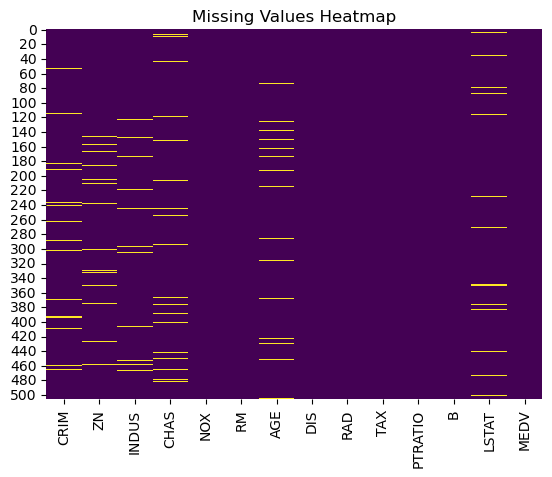

In [153]:
#데이터 정보 확인(타입, 결측값 등)
df.info()

import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 시각화
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

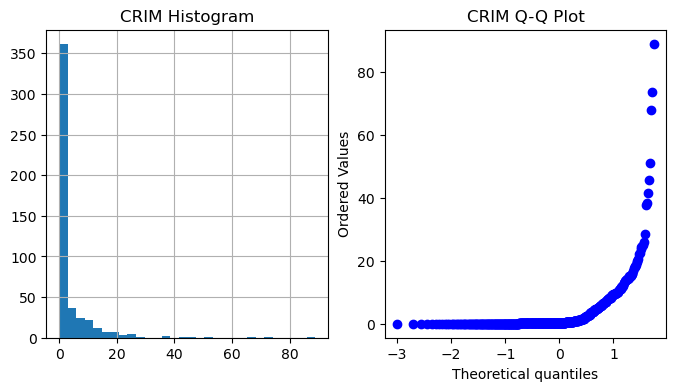

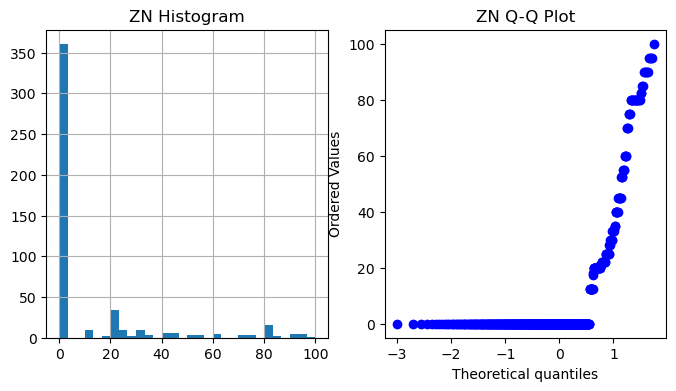

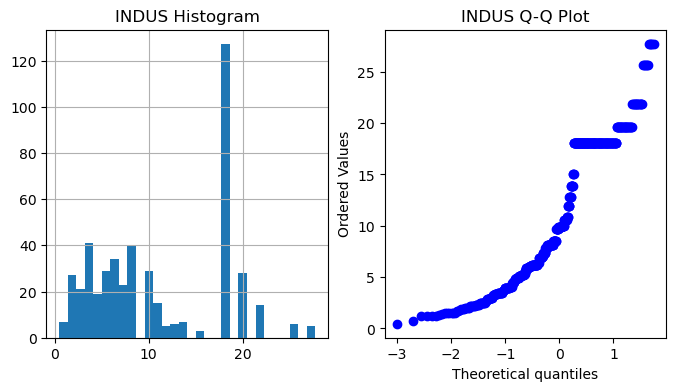

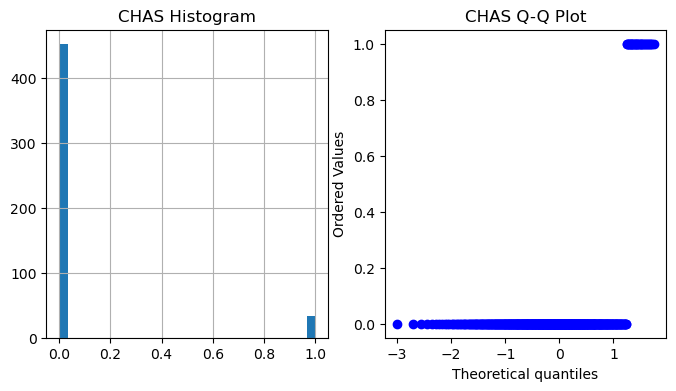

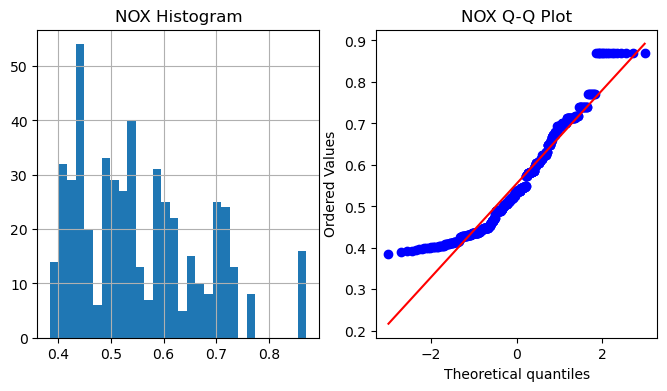

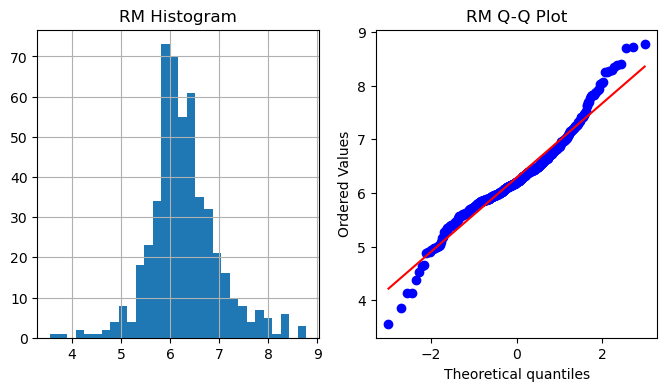

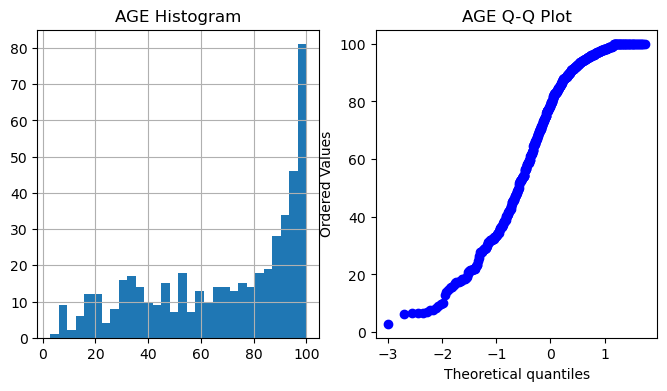

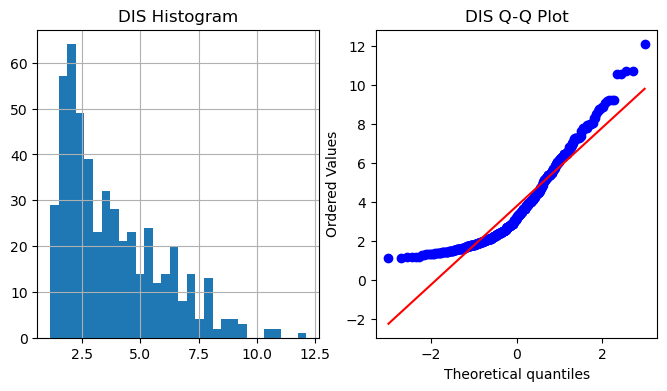

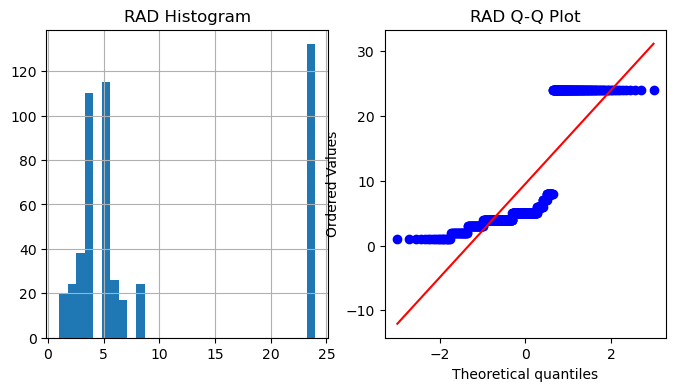

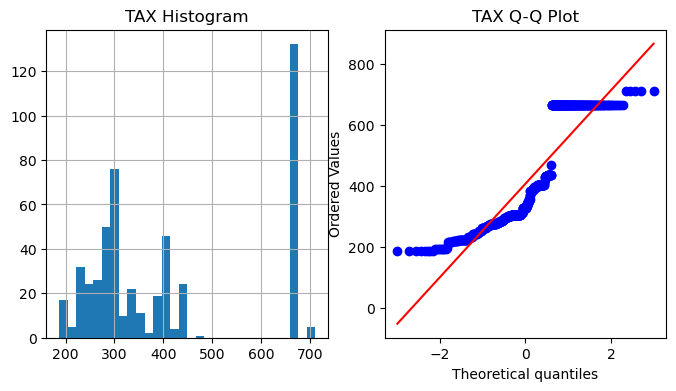

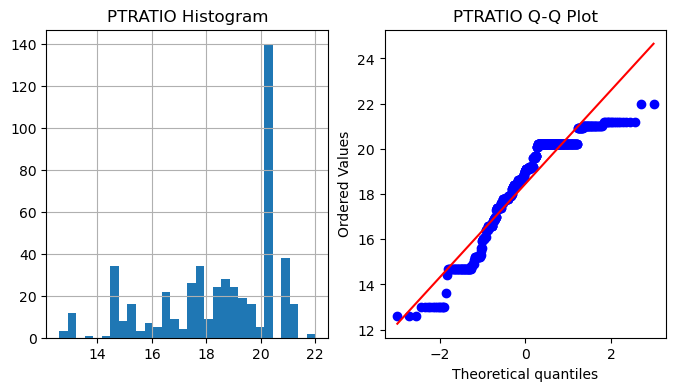

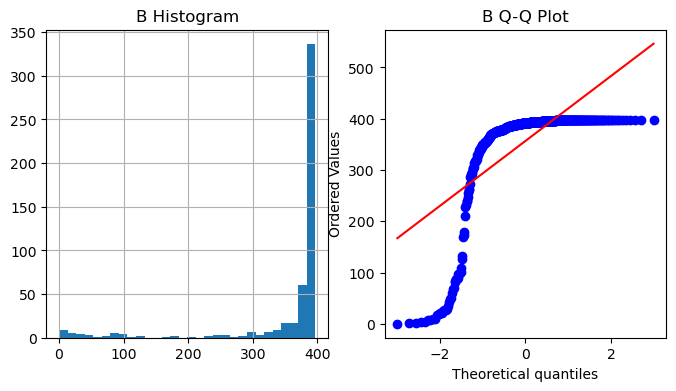

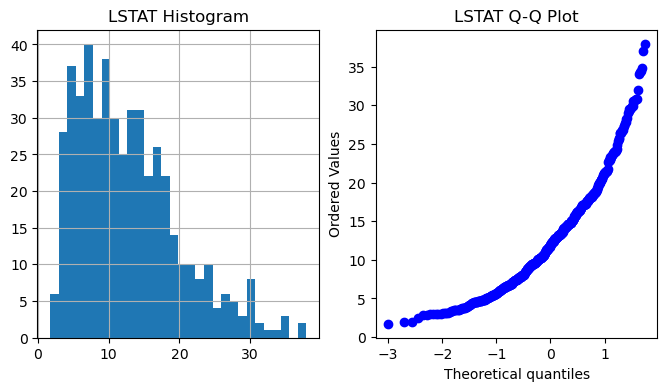

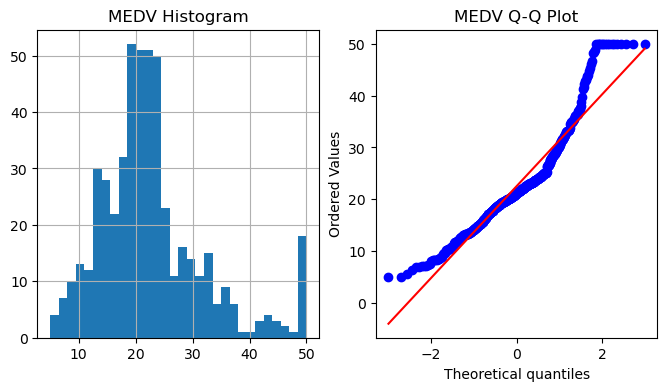

In [154]:
#데이터 정규성 확인
import scipy.stats as stats
import matplotlib.pyplot as plt

# 모든 특성 변수에 대해 히스토그램과 Q-Q 플롯
for column in df.columns:
    # 히스토그램
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    df[column].hist(bins=30)
    plt.title(f'{column} Histogram')

    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'{column} Q-Q Plot')
    
    plt.show()


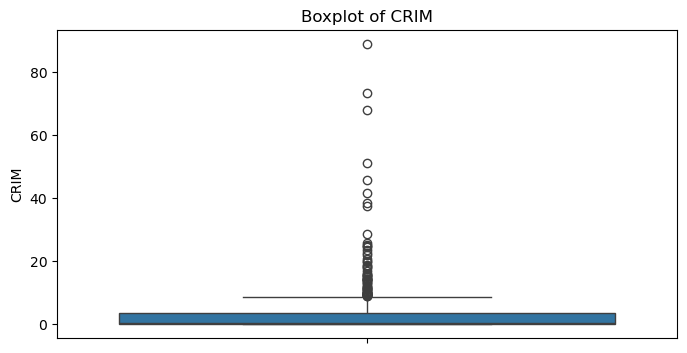

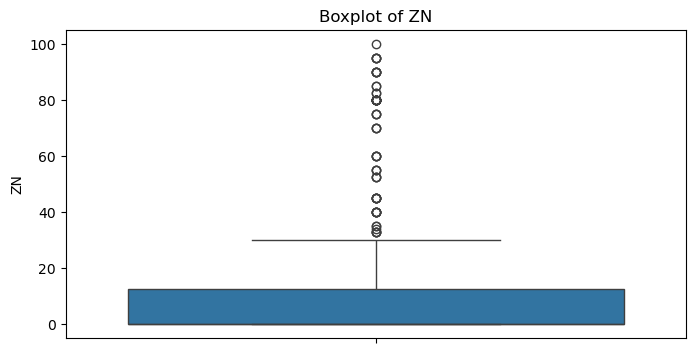

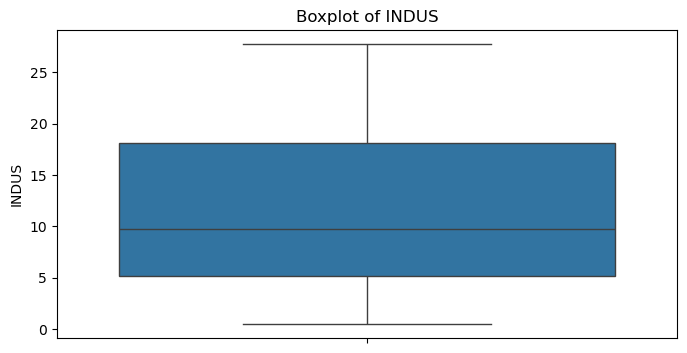

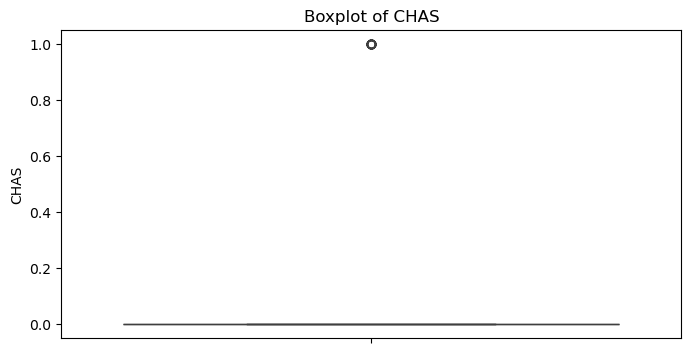

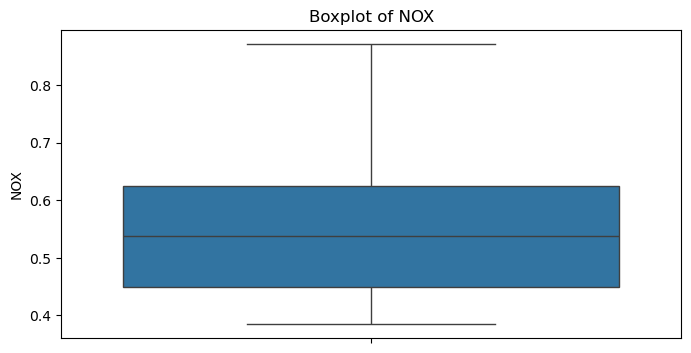

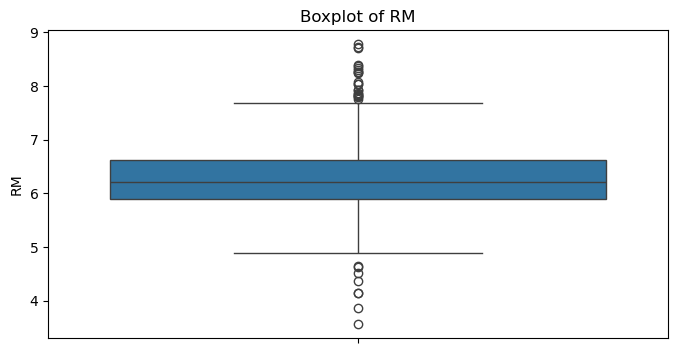

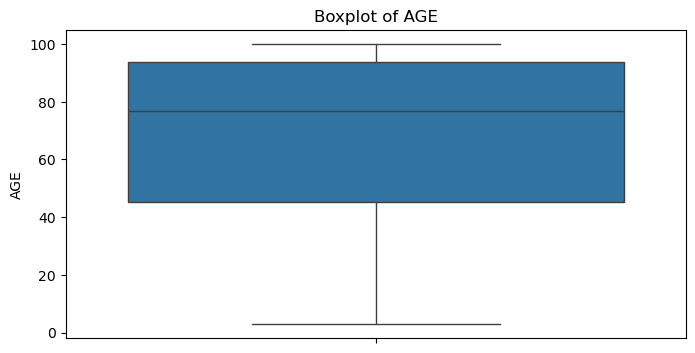

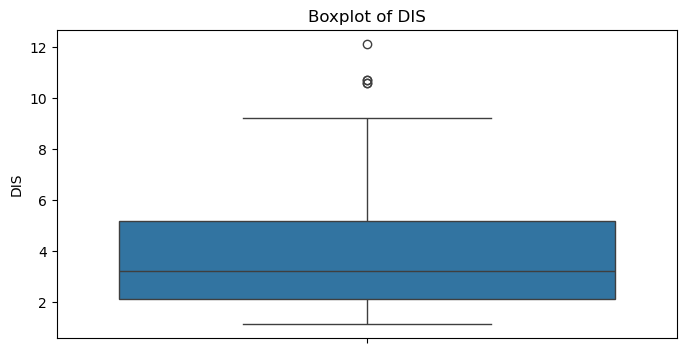

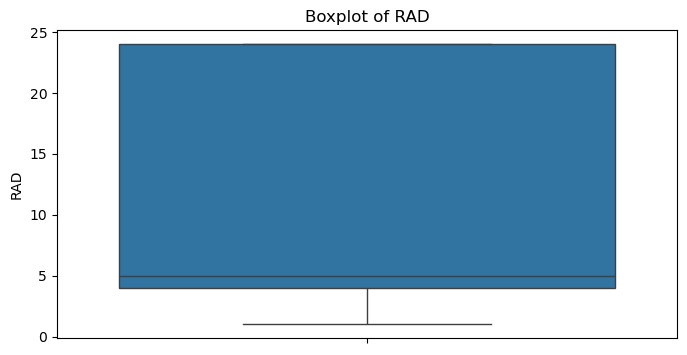

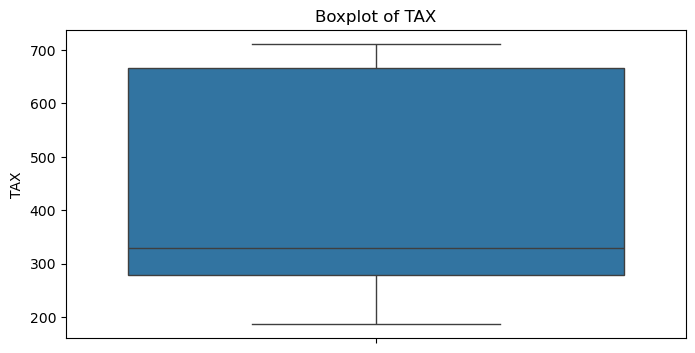

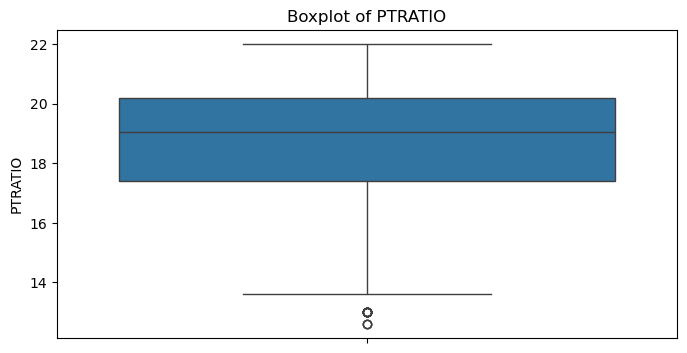

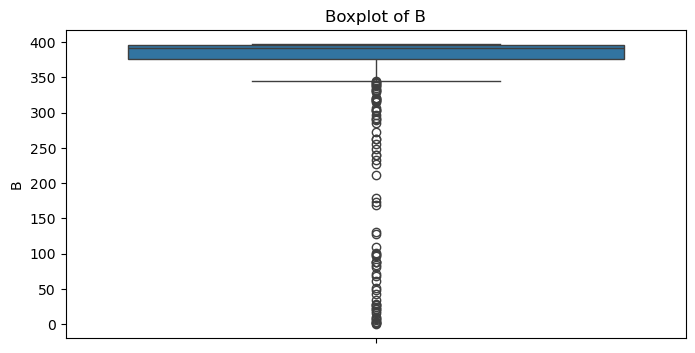

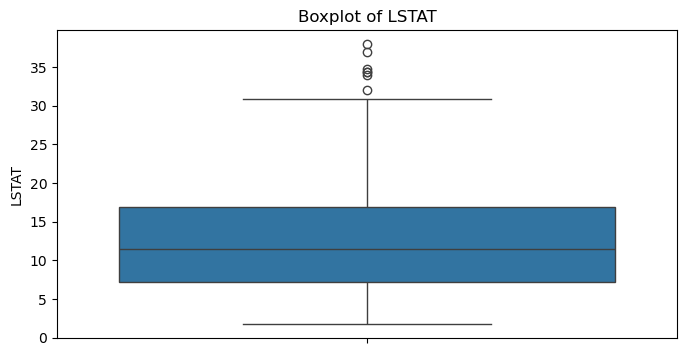

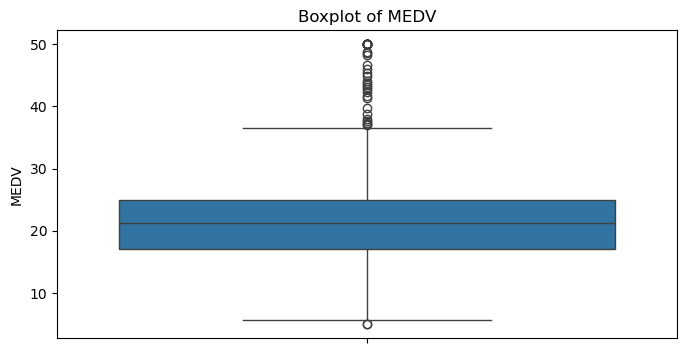

CRIM       65
ZN         63
INDUS       0
CHAS       34
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
dtype: int64


In [195]:
# 이상치 시각화 및 탐지

# Boxplot으로 이상치 시각화
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# IQR 기반 이상치 탐지
Q1 = df.quantile(0.25)  # 1사분위수
Q3 = df.quantile(0.75)  # 3사분위수
IQR = Q3 - Q1
# 이상치 경계
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 이상치 탐지
outliers = (df < lower_bound) | (df > upper_bound)
print(outliers.sum())  # 각 열에서 이상치 개수 출력


# from scipy.stats import zscore
# # Z-Score 계산
# z_scores = df.apply(zscore)

# # Z-Score 기준 이상치 탐지 (절댓값이 3을 초과하는 경우 이상치로 간주)
# outliers_z = (z_scores.abs() > 3)
# print(outliers_z.sum())  # 각 열에서 이상치 개수 출력

In [212]:
# 이상치 제거 및 대체

# 이상치 비율 5% 이하: 제거
# IQR 기준 이상치 제거
for column in ['DIS', 'LSTAT', 'PTRATIO','NOX']:
    df = df[~((df[column] < lower_bound[column]) | (df[column] > upper_bound[column]))]
    
# 이상치 비율 5%~15%: 대체 
# 중앙값으로 이상치 대체
for column in ['CRIM', 'ZN', 'CHAS', 'RM']:
    median_value = df[column].median()
    df[column] = df[column].where((df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column]), median_value)

# 0과 100 사이로 클리핑
# B는 아프리카계 미국인 비율을 나타내므로, 0~100% 범위 내에서 값이 유지되어야 한다. 그래서 0,100사이로 지정
df['B'] = df['B'].clip(0, 100)

# IQR 기반 이상치 탐지
Q1 = df.quantile(0.25)  # 1사분위수
Q3 = df.quantile(0.75)  # 3사분위수
IQR = Q3 - Q1
# 이상치 경계
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 이상치 탐지
outliers = (df < lower_bound) | (df > upper_bound)
print(outliers.sum())  # 각 열에서 이상치 개수 출력


CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          1
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B          28
LSTAT       0
MEDV       35
dtype: int64


In [ ]:
# 선형회귀 모델 결측치 + 학습
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import itertools

# 결측값을 처리할 열
columns_to_check = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# 결측값을 처리할 방법들
methods = ['dropna', 'fillna_zero', 'fillna_mean', 'fillna_median', 'fillna_mode']

# 모델 평가 함수
def evaluate_model(X, y):
    # 훈련 세트와 테스트 세트 분리 (80% 훈련, 20% 테스트)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 선형 회귀 모델 훈련
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 예측값
    y_pred = model.predict(X_test)
    
    # R^2 점수 계산
    r2 = r2_score(y_test, y_pred)
    # MAE, MSE 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2, mae, mse

# 결과 저장할 변수
results = {}

# 모든 가능한 결측값 처리 방법의 조합 생성
all_combinations = itertools.product(methods, repeat=len(columns_to_check))

# 결측값 처리 및 평가
X_all = df.drop(columns='MEDV')  # MEDV 열 제외하고 X값 생성

for combination in all_combinations:
    df_temp = df.copy()  # 원본 데이터를 복사
    
    # 각 열에 대해 결측값 처리 방법 적용
    for idx, column in enumerate(columns_to_check):
        method = combination[idx]  # 해당 열에 대한 결측값 처리 방법
        
        if method == 'dropna':
            df_temp = df_temp.dropna(subset=[column])  # 결측값이 포함된 행 제거
        elif method == 'fillna_zero':
            df_temp[column] = df_temp[column].fillna(0)  # 결측값을 0으로 채우기
        elif method == 'fillna_mean':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mean())  # 결측값을 평균으로 채우기
        elif method == 'fillna_median':
            df_temp[column] = df_temp[column].fillna(df_temp[column].median())  # 결측값을 중앙값으로 채우기
        elif method == 'fillna_mode':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mode().iloc[0])  # 결측값을 최빈값으로 채우기

    # X_temp와 y_temp 생성 (필요한 경우 결측값이 처리된 후 X_temp가 비지 않는지 확인)
    X_temp = df_temp.drop(columns='MEDV')
    y_temp = df_temp['MEDV']
    
    # 결측값 처리 후 X_temp가 비지 않으면 모델 평가
    if X_temp.shape[0] > 0 and not X_temp.isnull().values.any():  # X_temp가 비지 않고 결측값이 없는지 확인
        r2, mae, mse = evaluate_model(X_temp, y_temp)
        # 결과 저장 (결측값 처리 방법의 조합을 키로 사용)
        results[combination] = {'R²': r2, 'MAE': mae, 'MSE': mse}

# 결과를 R² 기준으로 내림차순 정렬하여 상위 10개 출력
sorted_results = sorted(results.items(), key=lambda x: x[1]['R²'], reverse=True)[:10]

# 상위 10개 결과 출력
for idx, (combination, scores) in enumerate(sorted_results, 1):
    print(f"Top {idx} Combination: {combination}, R²: {scores['R²']:.4f}, MAE: {scores['MAE']:.4f}, MSE: {scores['MSE']:.4f}")


Top 1 Combination: ('dropna', 'fillna_mean', 'fillna_mode', 'dropna', 'fillna_zero', 'fillna_mode'), R²: 0.8476, MAE: 2.2881, MSE: 9.0389
Top 2 Combination: ('dropna', 'fillna_zero', 'fillna_mode', 'dropna', 'fillna_zero', 'fillna_mode'), R²: 0.8468, MAE: 2.3035, MSE: 9.0881
Top 3 Combination: ('dropna', 'fillna_median', 'fillna_mode', 'dropna', 'fillna_zero', 'fillna_mode'), R²: 0.8468, MAE: 2.3035, MSE: 9.0881
Top 4 Combination: ('dropna', 'fillna_mode', 'fillna_mode', 'dropna', 'fillna_zero', 'fillna_mode'), R²: 0.8468, MAE: 2.3035, MSE: 9.0881
Top 5 Combination: ('dropna', 'fillna_mean', 'fillna_mode', 'dropna', 'fillna_mean', 'fillna_mode'), R²: 0.8466, MAE: 2.2822, MSE: 9.0966
Top 6 Combination: ('dropna', 'fillna_mean', 'fillna_mean', 'dropna', 'fillna_zero', 'fillna_mode'), R²: 0.8465, MAE: 2.2926, MSE: 9.1041
Top 7 Combination: ('dropna', 'fillna_mean', 'fillna_mode', 'dropna', 'fillna_median', 'fillna_mode'), R²: 0.8462, MAE: 2.2824, MSE: 9.1236
Top 8 Combination: ('dropna', 

In [165]:
# 의사결정 모델 결측치 + 학습
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import itertools

# 결측값을 처리할 열
columns_to_check = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# 결측값을 처리할 방법들
methods = ['dropna', 'fillna_zero', 'fillna_mean', 'fillna_median', 'fillna_mode']

# 모델 평가 함수
def evaluate_model(X, y):
    # 훈련 세트와 테스트 세트 분리 (80% 훈련, 20% 테스트)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 의사결정 모델 훈련
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # 예측값
    y_pred = model.predict(X_test)
    
    # R^2 점수 계산
    r2 = r2_score(y_test, y_pred)
    # MAE, MSE 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2, mae, mse

# 결과 저장할 변수
results = {}

# 모든 가능한 결측값 처리 방법의 조합 생성
all_combinations = itertools.product(methods, repeat=len(columns_to_check))

# 결측값 처리 및 평가
X_all = df.drop(columns='MEDV')  # MEDV 열 제외하고 X값 생성

for combination in all_combinations:
    df_temp = df.copy()  # 원본 데이터를 복사
    
    # 각 열에 대해 결측값 처리 방법 적용
    for idx, column in enumerate(columns_to_check):
        method = combination[idx]  # 해당 열에 대한 결측값 처리 방법
        
        if method == 'dropna':
            df_temp = df_temp.dropna(subset=[column])  # 결측값이 포함된 행 제거
        elif method == 'fillna_zero':
            df_temp[column] = df_temp[column].fillna(0)  # 결측값을 0으로 채우기
        elif method == 'fillna_mean':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mean())  # 결측값을 평균으로 채우기
        elif method == 'fillna_median':
            df_temp[column] = df_temp[column].fillna(df_temp[column].median())  # 결측값을 중앙값으로 채우기
        elif method == 'fillna_mode':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mode().iloc[0])  # 결측값을 최빈값으로 채우기

    # X_temp와 y_temp 생성 (필요한 경우 결측값이 처리된 후 X_temp가 비지 않는지 확인)
    X_temp = df_temp.drop(columns='MEDV')
    y_temp = df_temp['MEDV']
    
    # 결측값 처리 후 X_temp가 비지 않으면 모델 평가
    if X_temp.shape[0] > 0 and not X_temp.isnull().values.any():  # X_temp가 비지 않고 결측값이 없는지 확인
        r2, mae, mse = evaluate_model(X_temp, y_temp)
        # 결과 저장 (결측값 처리 방법의 조합을 키로 사용)
        results[combination] = {'R²': r2, 'MAE': mae, 'MSE': mse}

# 결과를 R² 기준으로 내림차순 정렬하여 상위 10개 출력
sorted_results = sorted(results.items(), key=lambda x: x[1]['R²'], reverse=True)[:10]

# 상위 10개 결과 출력
for idx, (combination, scores) in enumerate(sorted_results, 1):
    print(f"Top {idx} Combination: {combination}, R²: {scores['R²']:.4f}, MAE: {scores['MAE']:.4f}, MSE: {scores['MSE']:.4f}")

Top 1 Combination: ('dropna', 'dropna', 'fillna_median', 'dropna', 'fillna_mean', 'fillna_zero'), R²: 0.8380, MAE: 2.6375, MSE: 12.4487
Top 2 Combination: ('dropna', 'dropna', 'fillna_median', 'dropna', 'fillna_median', 'fillna_zero'), R²: 0.8380, MAE: 2.6375, MSE: 12.4487
Top 3 Combination: ('dropna', 'dropna', 'fillna_median', 'fillna_zero', 'fillna_mean', 'fillna_zero'), R²: 0.8380, MAE: 2.6375, MSE: 12.4487
Top 4 Combination: ('dropna', 'dropna', 'fillna_median', 'fillna_zero', 'fillna_median', 'fillna_zero'), R²: 0.8380, MAE: 2.6375, MSE: 12.4487
Top 5 Combination: ('dropna', 'dropna', 'fillna_median', 'fillna_mean', 'fillna_mean', 'fillna_zero'), R²: 0.8380, MAE: 2.6375, MSE: 12.4487
Top 6 Combination: ('dropna', 'dropna', 'fillna_median', 'fillna_mean', 'fillna_median', 'fillna_zero'), R²: 0.8380, MAE: 2.6375, MSE: 12.4487
Top 7 Combination: ('dropna', 'dropna', 'fillna_median', 'fillna_median', 'fillna_mean', 'fillna_zero'), R²: 0.8380, MAE: 2.6375, MSE: 12.4487
Top 8 Combinati

In [ ]:
# 랜덤포레스트 모델 결측치 + 학습
# 이상치 2번 제거 대체 한 모델

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 결측값 처리 방법 지정
fill_methods = {
    'CRIM': 'mean',
    'ZN': 'median',
    'INDUS': 'mean',
    'CHAS': 'mode',
    'AGE': 'median',
    'LSTAT': 'mean'
}

# 결측값 처리 함수
def handle_missing_values(df, fill_methods):
    df_temp = df.copy()
    for column, method in fill_methods.items():
        if method == 'mean':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mean())
        elif method == 'median':
            df_temp[column] = df_temp[column].fillna(df_temp[column].median())
        elif method == 'mode':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mode().iloc[0])
    return df_temp

# 모델 평가 함수
def evaluate_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return r2, mae, mse

# 결측값 처리
df_cleaned = handle_missing_values(df, fill_methods)

# X, y 분리
X = df_cleaned.drop(columns='MEDV')
y = df_cleaned['MEDV']

# 모델 평가
print("LinearRegression:")
lr_model = LinearRegression()
lr_r2, lr_mae, lr_mse = evaluate_model(df_cleaned.drop(columns='MEDV'), df_cleaned['MEDV'], lr_model)
print(f"R²: {lr_r2:.4f}, MAE: {lr_mae:.4f}, MSE: {lr_mse:.4f}")

print("\nDecision Tree Results:")
dt_model = DecisionTreeRegressor(random_state=42)
dt_r2, dt_mae, dt_mse = evaluate_model(df_cleaned.drop(columns='MEDV'), df_cleaned['MEDV'], dt_model)
print(f"R²: {dt_r2:.4f}, MAE: {dt_mae:.4f}, MSE: {dt_mse:.4f}")

print("\nRandom Forest Results:")
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_r2, rf_mae, rf_mse = evaluate_model(X, y, rf_model)
print(f"R²: {rf_r2:.4f}, MAE: {rf_mae:.4f}, MSE: {rf_mse:.4f}")


LinearRegression:
R²: 0.6339, MAE: 3.7815, MSE: 28.1283

Decision Tree Results:
R²: 0.8073, MAE: 2.7479, MSE: 14.8108

Random Forest Results:
R²: 0.9023, MAE: 2.0237, MSE: 7.5035


In [215]:
#3개 모델 비교

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 각 모델에 맞는 결측값 처리 방법
fill_methods_rf = {  # 랜덤 포레스트에 적용
    'CRIM': 'mean',
    'ZN': 'median',
    'INDUS': 'mean',
    'CHAS': 'mode',
    'AGE': 'median',
    'LSTAT': 'mean'
}

fill_methods_lr = {  # 선형 회귀에 적용 
    'CRIM': 'dropna',
    'ZN': 'mean',
    'INDUS': 'mode',
    'CHAS': 'dropna',
    'AGE': 'fillna_zero',
    'LSTAT': 'mode'
}

fill_methods_dt = {  # 의사결정 나무에 적용
    'CRIM': 'dropna',
    'ZN': 'fillna_zero',
    'INDUS': 'fillna_zero',
    'CHAS': 'dropna',
    'AGE': 'dropna',
    'LSTAT': 'dropna'
}

# 결측값 처리 함수
def handle_missing_values(df, fill_methods):
    df_temp = df.copy()
    for column, method in fill_methods.items():
        if method == 'dropna':
            df_temp = df_temp.dropna(subset=[column])  # 결측값이 포함된 행 제거
        elif method == 'mean':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mean())
        elif method == 'median':
            df_temp[column] = df_temp[column].fillna(df_temp[column].median())
        elif method == 'mode':
            df_temp[column] = df_temp[column].fillna(df_temp[column].mode().iloc[0])
        elif method == 'fillna_zero':
            df_temp[column] = df_temp[column].fillna(0)  # 추가: 0으로 채우는 방법
    return df_temp

# 모델 평가 함수
def evaluate_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return r2, mae, mse

# df_cleaned 데이터 준비
df_cleaned_rf = handle_missing_values(df, fill_methods_rf)
df_cleaned_lr = handle_missing_values(df, fill_methods_lr)
df_cleaned_dt = handle_missing_values(df, fill_methods_dt)

# X, y 분리
X_rf = df_cleaned_rf.drop(columns='MEDV')
y_rf = df_cleaned_rf['MEDV']

X_lr = df_cleaned_lr.drop(columns='MEDV')
y_lr = df_cleaned_lr['MEDV']

X_dt = df_cleaned_dt.drop(columns='MEDV')
y_dt = df_cleaned_dt['MEDV']

# 선형 회귀 모델 평가
print("Linear Regression Results:")
lr_model = LinearRegression()
lr_r2, lr_mae, lr_mse = evaluate_model(X_lr, y_lr, lr_model)
print(f"R²: {lr_r2:.4f}, MAE: {lr_mae:.4f}, MSE: {lr_mse:.4f}")

# 의사결정 나무 모델 평가
print("\nDecision Tree Results:")
dt_model = DecisionTreeRegressor(random_state=42)
dt_r2, dt_mae, dt_mse = evaluate_model(X_dt, y_dt, dt_model)
print(f"R²: {dt_r2:.4f}, MAE: {dt_mae:.4f}, MSE: {dt_mse:.4f}")

# 랜덤 포레스트 모델 평가
print("\nRandom Forest Results:")
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_r2, rf_mae, rf_mse = evaluate_model(X_rf, y_rf, rf_model)
print(f"R²: {rf_r2:.4f}, MAE: {rf_mae:.4f}, MSE: {rf_mse:.4f}")

Linear Regression Results:
R²: 0.8476, MAE: 2.2881, MSE: 9.0389

Decision Tree Results:
R²: 0.8862, MAE: 2.4733, MSE: 10.4513

Random Forest Results:
R²: 0.8856, MAE: 2.0630, MSE: 8.3863


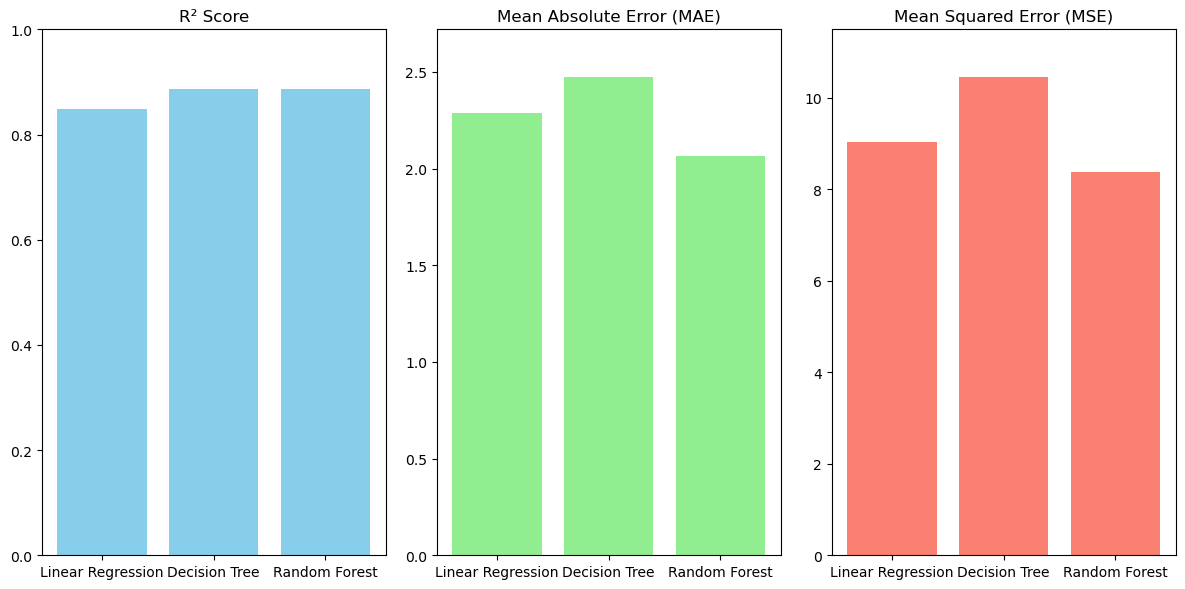

In [ ]:
# 3개 모델 비교 후 그래프로 시각화

# 결과를 저장할 리스트
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [lr_r2, dt_r2, rf_r2]
mae_scores = [lr_mae, dt_mae, rf_mae]
mse_scores = [lr_mse, dt_mse, rf_mse]

# 그래프 그리기
x = np.arange(len(models))  # 모델의 인덱스

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# R², MAE, MSE의 바 그래프 생성
plt.subplot(1, 3, 1)
plt.bar(x, r2_scores, color='skyblue')
plt.xticks(x, models)
plt.title('R² Score')
plt.ylim(0, 1)

plt.subplot(1, 3, 2)
plt.bar(x, mae_scores, color='lightgreen')
plt.xticks(x, models)
plt.title('Mean Absolute Error (MAE)')
plt.ylim(0, max(mae_scores) * 1.1)

plt.subplot(1, 3, 3)
plt.bar(x, mse_scores, color='salmon')
plt.xticks(x, models)
plt.title('Mean Squared Error (MSE)')
plt.ylim(0, max(mse_scores) * 1.1)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()